In [2]:
# make the necessary imports
import numpy as np
from matplotlib import pyplot as plt
from Models.CustomClassifier import DecisionTree
from Utilities.Evaluate import evaluate
import Utilities.Visualization as vs



    

In [3]:
clean_dataset, noisy_dataset = np.loadtxt("Data/wifi_db/clean_dataset.txt", dtype = np.float32), np.loadtxt("Data/wifi_db/noisy_dataset.txt", dtype = np.float64)


In [4]:
print(" Shape of Clean Dataset : ", clean_dataset.shape)
print(" Shape of Noisy Dataset : ", noisy_dataset.shape)


 Shape of Clean Dataset :  (2000, 8)
 Shape of Noisy Dataset :  (2000, 8)


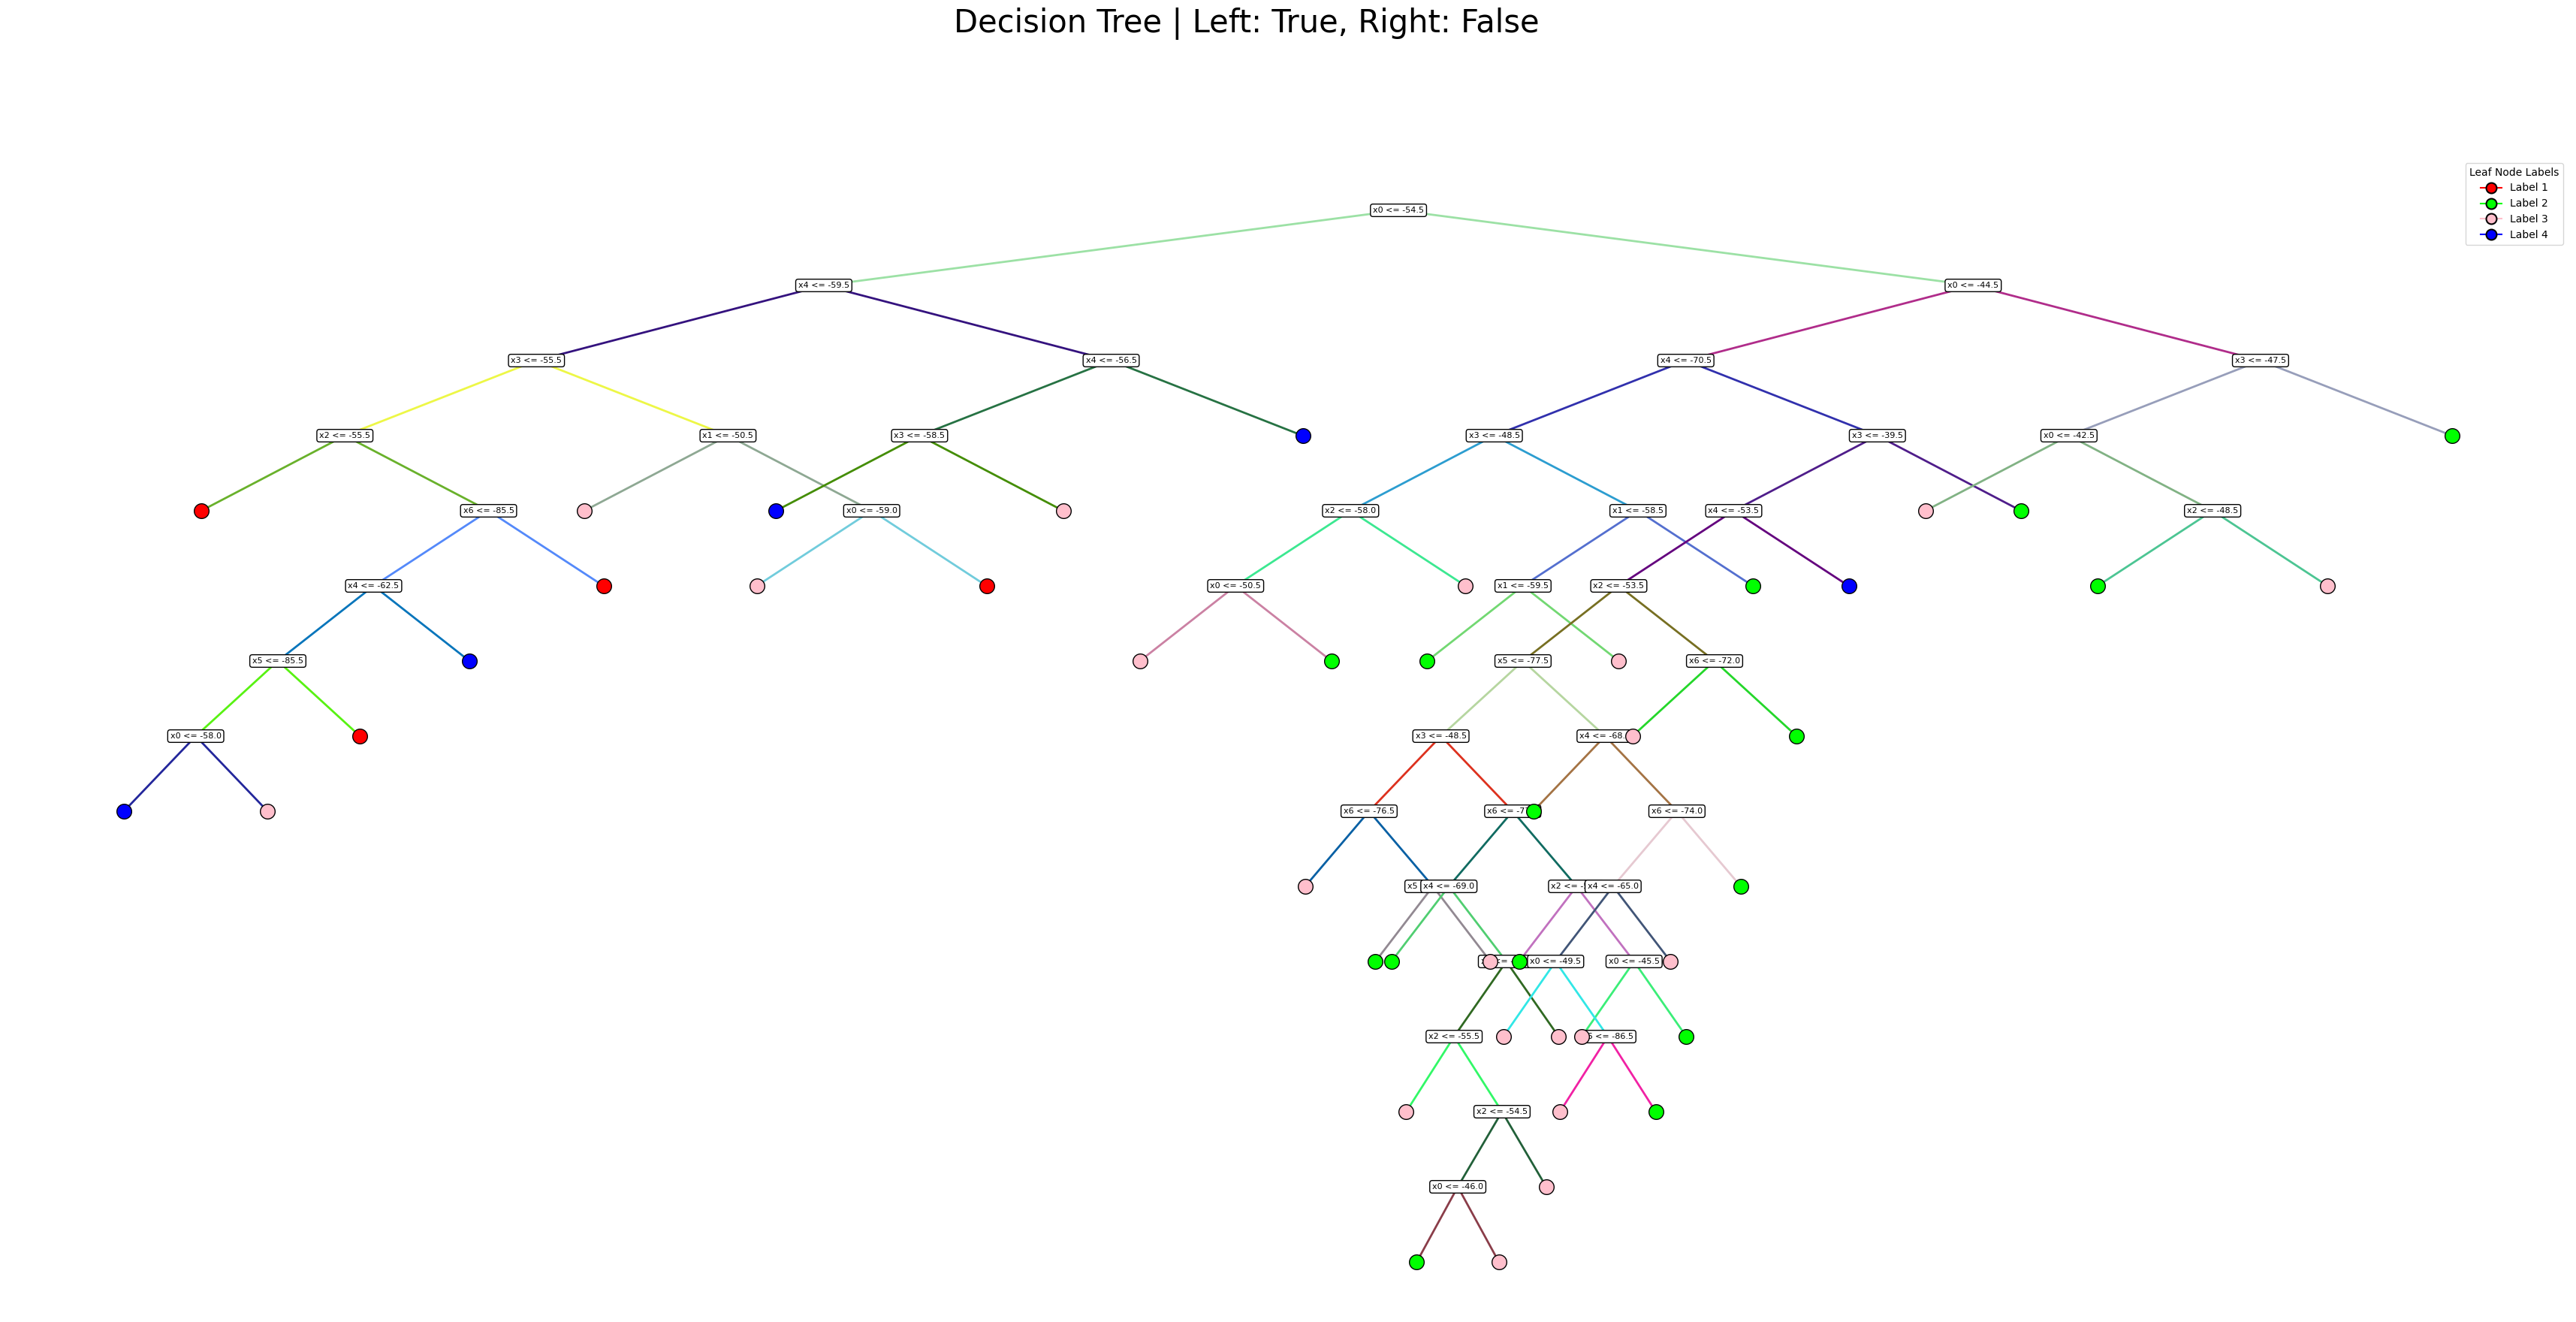

Tree visualization saved as: tree_visualizations\decision_tree.png


<Figure size 640x480 with 0 Axes>

In [5]:
# Lets visualize our tree start by importing the 

clf = DecisionTree()
root, _ = clf.fit(clean_dataset)

vs.save_tree_as_png(root)



In [13]:

decision_tree = DecisionTree()

In [14]:
def k_fold_cross_validation(dataset, n_splits, n_classes):
    
    np.random.shuffle(dataset)
    n_samples = len(dataset)
    fold_size = n_samples // n_splits
    indices = np.arange(n_samples)

        # Variables to accumulate results
    total_cm = np.zeros((n_classes, n_classes), dtype=int)  # Adjust for number of classes if needed
    total_accuracy = 0
    total_precision = np.zeros(4)  # Adjust for number of classes
    total_recall = np.zeros(4)     # Adjust for number of classes
    total_f1 = np.zeros(4)         # Adjust for number of classes

    for i in range(n_splits):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]], axis = 0)

            # Prepare training and testing data
        train_set = dataset[train_indices]
        test_set = dataset[test_indices]

            # Train the decision tree
        decision_tree.fit(train_set)
        # Evaluate performance on the test fold
        cm, precision, recall, accuracy, f1 = evaluate(test_set, decision_tree, 4)
            
            #print(cm)
            
            
            
            # Accumulate results
        total_cm += cm
        total_accuracy += accuracy
        total_precision += precision
        total_recall += recall
        total_f1 += f1

        # Compute averages
        
    average_cm = total_cm // n_splits
    average_accuracy = total_accuracy / n_splits
    average_precision = total_precision / n_splits
    average_recall = total_recall / n_splits
    average_f1 = total_f1 / n_splits
    
    return average_cm, average_accuracy, average_precision, average_recall, average_f1

    

In [17]:
average_cm, average_accuracy, average_precision, average_recall, average_f1 = k_fold_cross_validation(clean_dataset, 10, 4)

print("Average Confusion Matrix:\n", average_cm)
print("Average Accuracy:", average_accuracy)
print("Average Precision per Class:", average_precision)
print("Average Recall per Class:", average_recall)
print("Average F1 Score per Class:", average_f1)


Average Confusion Matrix:
 [[49  0  0  0]
 [ 0 47  2  0]
 [ 0  2 47  0]
 [ 0  0  0 49]]
Average Accuracy: 0.97
Average Precision per Class: [0.99400791 0.95766367 0.94425906 0.98440822]
Average Recall per Class: [0.98556565 0.95330685 0.95007225 0.98967295]
Average F1 Score per Class: [0.98963701 0.95528565 0.94693814 0.98688016]


In [18]:
average_cm_noisy, average_accuracy_noisy, average_precision_noisy, average_recall_noisy, average_f1_noisy = k_fold_cross_validation(noisy_dataset, 10, 4)

print("Average Confusion Matrix For Noisy Dataset:\n", average_cm_noisy)
print("Average Accuracy for Noisy Dataset:", average_accuracy_noisy)
print("Average Precision per Class for Noisy Dataset:", average_precision_noisy)
print("Average Recall per Class for Noisy Dataset:", average_recall_noisy)
print("Average F1 Score per Class for Noisy Dataset:", average_f1_noisy)


Average Confusion Matrix For Noisy Dataset:
 [[38  3  3  3]
 [ 3 40  4  1]
 [ 3  3 41  3]
 [ 4  2  3 39]]
Average Accuracy for Noisy Dataset: 0.8045
Average Precision per Class for Noisy Dataset: [0.77558794 0.81766883 0.80496201 0.82340044]
Average Recall per Class for Noisy Dataset: [0.7854048  0.82139291 0.81442914 0.80278496]
Average F1 Score per Class for Noisy Dataset: [0.77842774 0.81861287 0.80828474 0.81133238]
